In [1]:
# import packages
import warnings
from matplotlib import pyplot as plt

from qdl_klayout_extension.core.shapes import SimpleRectangle, coords_for_simple_polygon_merge, SimplePolygon
from qdl_klayout_extension.core.coordinates import Coordinates
from qdl_klayout_extension.core.layout import Layout
from qdl_klayout_extension.core.patterns import Pattern
from qdl_klayout_extension.visualize import plot_polygon, plot_pattern

warnings.filterwarnings("ignore")

In [2]:
layout = Layout()
layer = layout.layer(1, 0)

In [3]:
base_cell = layout.create_cell('base')

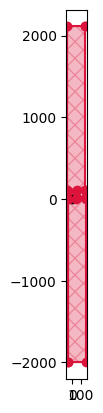

In [4]:
overlap_distance = 0.5
strip_width = 100
strip_length = 100
teeth_distance = 10
pad_length = 2000
pad_width_max = 3000
single_strip_pad_width = 2 * strip_width + 2 * teeth_distance
strip_bottom_ref_point = Coordinates(0, 0)
pad_top_edge_ref_point = Coordinates(strip_width/2 + teeth_distance, overlap_distance) + strip_bottom_ref_point

# define the strips of the comb and the pad
single_strip = SimpleRectangle.from_edge(strip_width, strip_length + overlap_distance, edge=strip_bottom_ref_point, edge_type='bottom')
single_strip_pad = SimpleRectangle.from_edge(single_strip_pad_width + overlap_distance*2, pad_length + overlap_distance*2, edge=pad_top_edge_ref_point, edge_type='top')

# merge shapes
merged_coords = coords_for_simple_polygon_merge(single_strip, single_strip_pad, Coordinates(0, 0))
combined_strip_and_pad = SimplePolygon(merged_coords)

# retrieve reflected shape
reflected_coords = merged_coords.get_reflected_x().get_reflected_y().get_translated(Coordinates(strip_width + teeth_distance, strip_length + teeth_distance))
reflected_strip_and_pad = SimplePolygon(reflected_coords)

# plot_coords(single_strip.coords)
# plot_coords(single_strip_pad.coords)
plot_polygon(combined_strip_and_pad)
plot_polygon(reflected_strip_and_pad)
plt.scatter(combined_strip_and_pad.ref_point.x_uu, combined_strip_and_pad.ref_point.y_uu, color='k')

In [5]:
base_cell.easy_insert(layer, [combined_strip_and_pad, reflected_strip_and_pad])

In [6]:
layout.write('example_3_base_strip.gds')

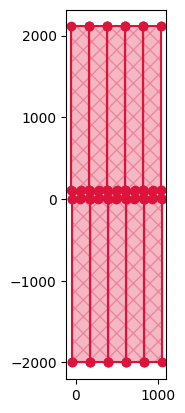

In [7]:
dist_x = single_strip_pad_width
dist_y = 0
n_x = pad_width_max // single_strip_pad_width
n_y = 1
angle = 0
global_displacement = Coordinates(0, 0)
pattern = Pattern(dist_x, dist_y, 5, n_y, angle, global_displacement)

plot_pattern(pattern, combined_strip_and_pad)
plot_pattern(pattern, reflected_strip_and_pad)

pattern = Pattern(dist_x, dist_y, n_x, n_y, angle, global_displacement)

In [8]:
array_inst = pattern.get_cell_array_instance(base_cell)
grid_cell = layout.create_cell('grid')
grid_cell.insert(array_inst)

cell_index=0 r0 0,0 array=(220000,0,0,0 13x1)

In [9]:
layout.write('example_3_strip_grid.gds')
